# Filtro

In [1]:
# Descargamos las librerías necesarias para el filtro
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
# Los filtros están en una archivo de filtros y basta con importatlos
from Filter import EtfFilter,  PairsFilter, PairsFilter2

In [2]:
# Leo los etf que servirán como arbitros en el filtro
etfs = list(pd.read_csv('ETFs_lIST.csv', index_col = [0]).columns)

In [3]:

# Definimos las fechas de busqueda
start = datetime.date(2021,1,1)
end = datetime.date(2022,6,30)

In [4]:
np.random.seed(10)


# Iniicalizo los filtros. Existen 2 maneras de inicializar los filtros

# Opción 1: Escogo los tickers, las fechas de inicio y final
# Definimos los tickers que queremos buscar
tickers= ['XOM', 'OXY', 'ENLC', 'ARLP']
Filtro_pares = PairsFilter(tickers, start, end)
# Opción 2: Escogo el tipo de ticker, si es stock defino a qué sector pertenece y defino el número de tickers que quiero buscar
Filtro_pares2 = PairsFilter2(stock_type="Stock", sector="Energy", number=10,start=start,end=end, interval="1d")


[*********************100%***********************]  4 of 4 completed


C:\Users\conso\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


[*********************100%***********************]  10 of 10 completed


In [5]:
# Corro el filtro para los segundos pares
print(f" Pares originales: {len(Filtro_pares2.pairs)}")
Filtro_pares2.correlationTest(tol = 0.7)
print(f" Pares después de aplicar correlación: {len(Filtro_pares2.pairs)}")
Filtro_pares2.variationalInformationTest(tol = 3.5, bins = 50)
print(f" Pares después de aplicar variación de la información: {len(Filtro_pares2.pairs)}")
Filtro_pares2.TopologicalEmbedding(tol=150)
print(f" Pares después de aplicar topological embedding: {len(Filtro_pares2.pairs)}")
Filtro_pares2.cointegration(tol=0.2)
print(f" Pares después de aplicar cointegración: {len(Filtro_pares2.pairs)}")


 Pares originales: 45
 Pares después de aplicar correlación: 24
 Pares después de aplicar variación de la información: 24
 Pares después de aplicar topological embedding: 19
 Pares después de aplicar cointegración: 3


In [6]:
# Imprimimos los pares encontrados al aplicar filtro
Filtro_pares2.pairs

[('CRGY', 'STR'), ('HP', 'STR'), ('CLR', 'BPT')]

In [7]:
# Creo la lista de tickers necesarios
tickers = ['CRGY', 'STR']

In [8]:
# Busco los tickers con sus pares de etfs 
Filtro_ETF = EtfFilter(etfs, tickers, start, end)

[*********************100%***********************]  1002 of 1002 completed


In [9]:
# Ahora se aplica el filtro para los pares de etfs
print(f" Pares originales: {len(Filtro_ETF.pairs)}")
Filtro_ETF.correlationTest(tol = 0.7)
print(f" Pares después de aplicar correlación: {len(Filtro_ETF.pairs)}")
Filtro_ETF.variationalInformationTest(tol = 3.75, bins = 50)
print(f" Pares después de aplicar variación de la información: {len(Filtro_ETF.pairs)}")
Filtro_ETF.TopologicalEmbedding(tol=200)
print(f" Pares después de aplicar topological embedding: {len(Filtro_ETF.pairs)}")
Filtro_ETF.cointegration(tol=0.2)
print(f" Pares después de aplicar cointegración: {len(Filtro_ETF.pairs)}")


 Pares originales: 2000
 Pares después de aplicar correlación: 187
 Pares después de aplicar variación de la información: 187
 Pares después de aplicar topological embedding: 181
 Pares después de aplicar cointegración: 89


# Listar ETFS

In [10]:
# Creo una función para encontrar los arbitros adecuados para cada par

'''
ticker1: Primer ticker
ticker2: Segundo ticker
df: dataframe de pairs
'''

def encontrar_ETF(ticker1, ticker2, filtro_ETF):
    
    
    filtro = pd.DataFrame(filtro_ETF.pairs, columns= ['ETF', 'Ticker']).set_index('ETF')
    
    
    df_pair1 = filtro.query(f"Ticker == '{ticker1}'")
    df_pair2 = filtro.query(f"Ticker == '{ticker2}'")
        
    ETF_df = pd.merge(df_pair1, df_pair2, right_index = True, left_index = True)
    
    ETF = ETF_df.index
    
    return list(ETF)
    

In [11]:
# Devuelve los etf adecuados para el par
pairs = encontrar_ETF('CRGY', 'STR', Filtro_ETF)

print(pairs)




['ATMP', 'CANE', 'CORN', 'DBA', 'DHS', 'ECH', 'EINC', 'EMLP', 'ENFR', 'FDL', 'FUE', 'FXU', 'GII', 'GRU', 'HDV', 'IDX', 'IEZ', 'IMLP', 'MLPX', 'NML', 'PXJ', 'RJA', 'RLY', 'RYU', 'TAGS', 'TPYP', 'WEAT', 'XES']


# Graficas

In [14]:
# Importamos MinMaxScaler para re escalar
from sklearn.preprocessing import MinMaxScaler

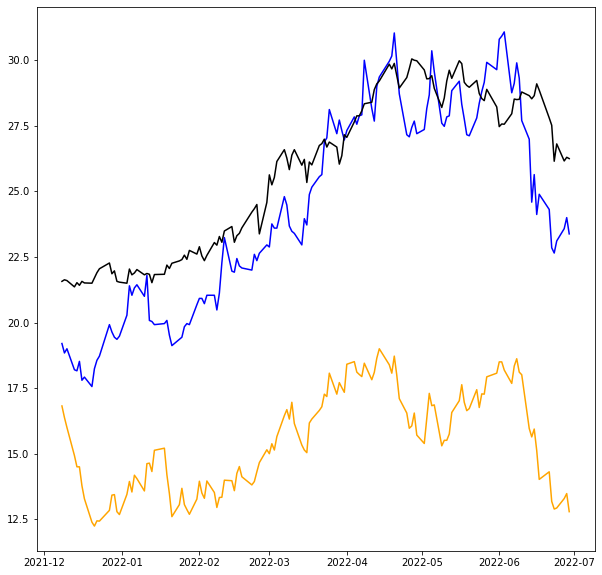

In [12]:
# Comparamos el par de tickers con su etf
A = "CRGY"
B = "STR"
C = "CORN"



plt.figure(figsize=(10,10))
plt.plot(Filtro_ETF.df[A], c= 'orange')
plt.plot(Filtro_ETF.df[B], c='blue')
plt.plot(Filtro_ETF.df[C], c='black')

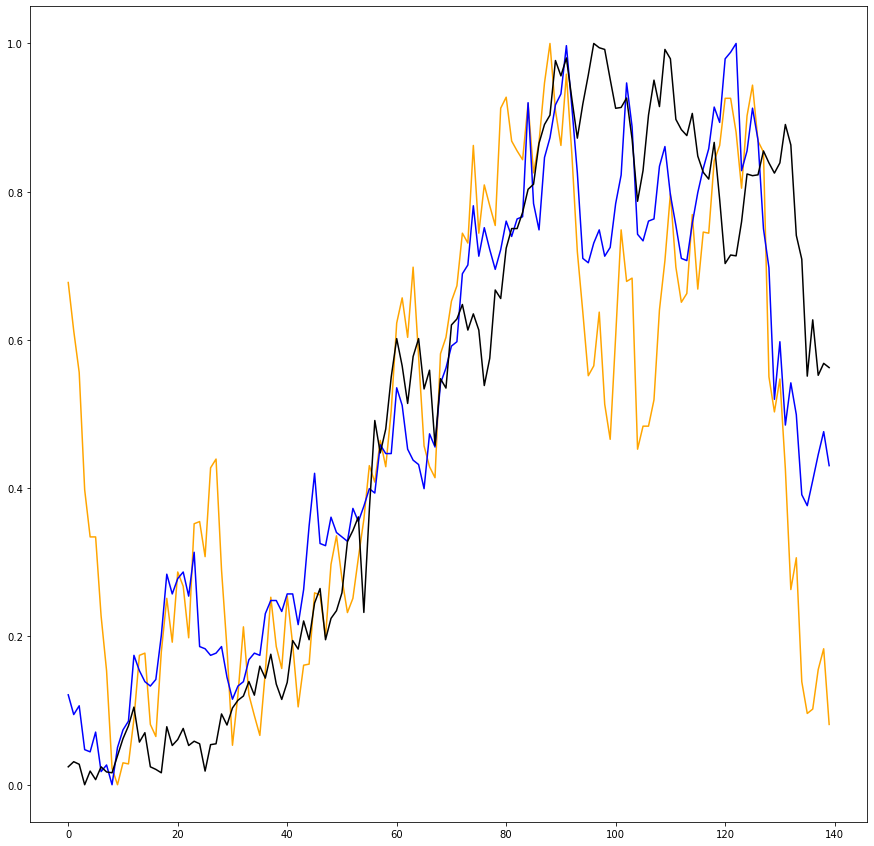

In [16]:
scaler = MinMaxScaler()

plt.figure(figsize=(15,15))
plt.plot(scaler.fit_transform(Filtro_ETF.df[[A]]), c='orange')
plt.plot(scaler.fit_transform(Filtro_ETF.df[[B]]), c="blue")
plt.plot(scaler.fit_transform(Filtro_ETF.df[[C]]), c="black")


[*********************100%***********************]  98 of 98 completed
[*********************100%***********************]  98 of 98 completed
[*********************100%***********************]  98 of 98 completed
[*********************100%***********************]  98 of 98 completed
[*********************100%***********************]  98 of 98 completed
[*********************100%***********************]  98 of 98 completed


[*********************100%***********************]  1098 of 1098 completed
[*********************100%***********************]  1098 of 1098 completed
[*********************100%***********************]  1098 of 1098 completed
[*********************100%***********************]  1098 of 1098 completed
[*********************100%***********************]  1098 of 1098 completed
[*********************100%***********************]  1098 of 1098 completed


C:\Users\conso\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\conso\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


[('AAPL', 'QCOM'),
 ('AAPL', 'SPLK'),
 ('ADSK', 'ISRG'),
 ('AMD', 'BMRN'),
 ('CERN', 'CHKP'),
 ('CERN', 'INCY'),
 ('COST', 'LULU'),
 ('EA', 'SPLK'),
 ('GOOG', 'GOOGL'),
 ('MU', 'WDC'),
 ('SPLK', 'TTWO'),
 ('CDNS', 'SPLK'),
 ('CERN', 'MDLZ'),
 ('CERN', 'PAYX'),
 ('CTSH', 'FISV'),
 ('MDLZ', 'PAYX'),
 ('NXPI', 'TXN'),
 ('ADBE', 'REGN'),
 ('CDNS', 'DXCM'),
 ('MSFT', 'SNPS'),
 ('ADBE', 'INTU'),
 ('ADI', 'AMAT'),
 ('ADP', 'CDNS'),
 ('ADP', 'VRSN'),
 ('AMAT', 'CDNS'),
 ('AMD', 'CDNS'),
 ('AMZN', 'CDNS'),
 ('CHKP', 'EBAY'),
 ('CTSH', 'FAST'),
 ('DLTR', 'QCOM'),
 ('FOX', 'FOXA'),
 ('GOOG', 'GOOGL'),
 ('MDLZ', 'PCAR'),
 ('VRSK', 'VRSN'),
 ('AAPL', 'CDW'),
 ('ADI', 'NXPI'),
 ('ADI', 'SWKS'),
 ('ADI', 'TXN'),
 ('ADP', 'TXN'),
 ('ADSK', 'BIIB'),
 ('ALGN', 'INTU'),
 ('AMAT', 'CPRT'),
 ('AMAT', 'DOCU'),
 ('AMAT', 'ZM'),
 ('AMZN', 'DOCU'),
 ('CDNS', 'SGEN'),
 ('CDW', 'NXPI'),
 ('CDW', 'QCOM'),
 ('CDW', 'SWKS'),
 ('CPRT', 'DOCU'),
 ('CPRT', 'MNST'),
 ('CPRT', 'ROST'),
 ('CPRT', 'SBUX'),
 ('CPRT', 'SWKS

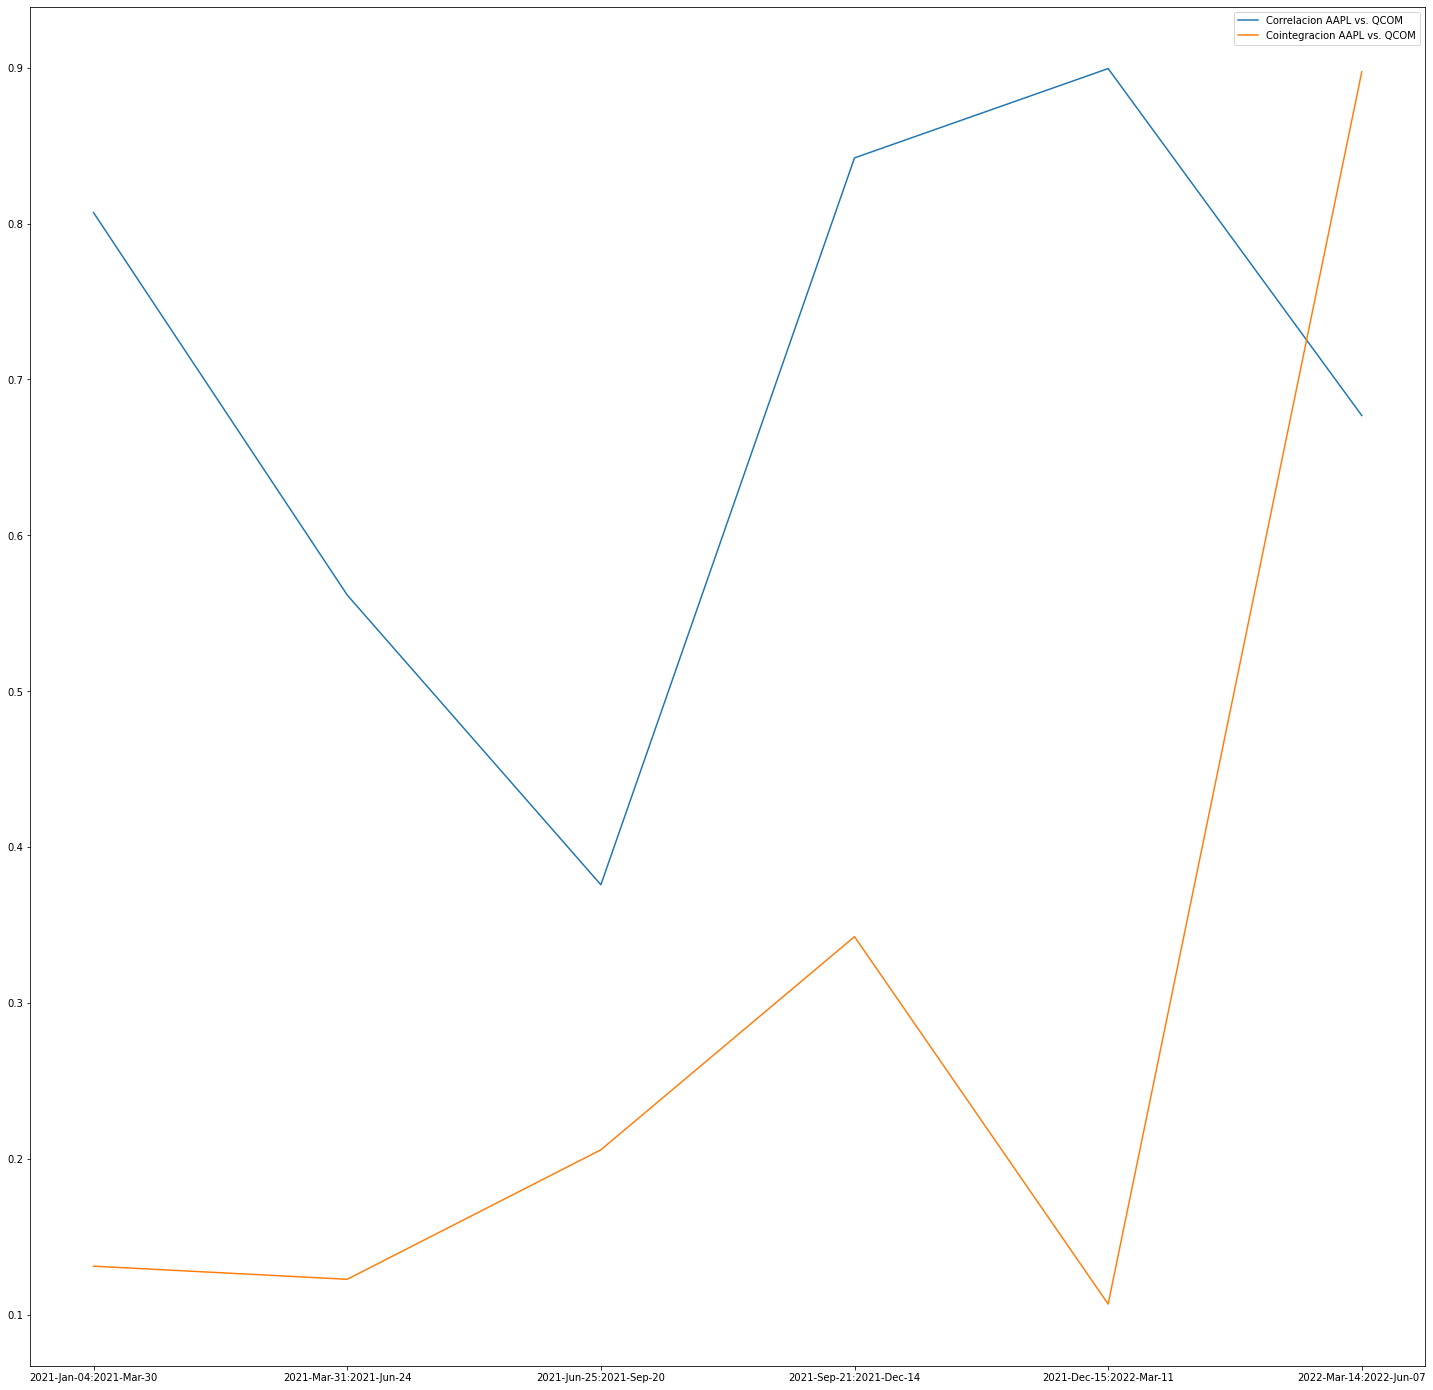